In [2]:
%matplotlib inline
import pandas as pd
import sys
sys.path.append('/mnt/code')
from constants import PROCESSED_DATASET
import seaborn as sns
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import numpy as np
from preprocess.read_obs import get_obs
from load_dataset import load_dataset
from preprocess.read_raster import get_raster_colnames, get_raster_names
from sklearn import svm

from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest

In [3]:
# load the dataset
dataset = load_dataset()

In [4]:
dataset

ufi  taxon_id reliability  rating_int   reliability_txt  \
0       613779    503998  Acceptable         0.0               NaN   
1      2001011    504391  Acceptable         0.0               NaN   
2      2001732    504391  Acceptable         0.0               NaN   
3      2001967    504391  Acceptable         0.0               NaN   
4      2002392    504391  Acceptable         0.0               NaN   
5      2655033    504391  Acceptable         0.0               NaN   
6      3892275     60555  Acceptable         0.0  High reliability   
7      3913538     60555  Acceptable         0.0  High reliability   
8      3920111     60555  Acceptable         0.0  High reliability   
9      3922496     13182  Acceptable         0.0  High reliability   
10     3923667     11028  Acceptable         0.0  High reliability   
11     3923610     13182  Acceptable         0.0  High reliability   
12     3923643     13182  Acceptable         0.0  High reliability   
13     3923874     11028  Acceptable         0.0  High reliability   
14     3923874     11028  Acceptable         0.0  High reliability   
15     3923824     13182  Acceptable         0.0  High reliability   
16     3926167     11028  Acceptable         0.0  High reliability   
17     3929575     11028  Acceptable         0.0               NaN   
18     3929575     11028  Acceptable         0.0               NaN   
19     3929576     11028  Acceptable         0.0               NaN   
20     3929576     11028  Acceptable         0.0               NaN   
21     3929574     11028  Acceptable         0.0  High reliability   
22     3929574     11028  Acceptable         0.0  High reliability   
23     3932253     60555  Acceptable         0.0  High reliability   
24     3942343     60555  Acceptable         0.0  High reliability   
25     3944929     13182  Acceptable         0.0  High reliability   
26     3964549     60555  Acceptable         0.0  High reliability   
27     3974071     60555  Acceptable         0.0  High reliability   
28     3978675     13182  Acceptable         0.0  High reliability   
29     3978675     13182  Acceptable         0.0  High reliability   
...        ...       ...         ...         ...               ...   
18860  8610940     11028  Acceptable         0.0               NaN   
18861  8610967     11028  Acceptable         0.0               NaN   
18862  8613532     11028  Acceptable         0.0               NaN   
18863  8614808     11028  Acceptable         0.0               NaN   
18864  8615004     11028  Acceptable         0.0               NaN   
18865  8615456     11028  Acceptable         0.0               NaN   
18866  8655585     11028         NaN         NaN               NaN   
18867  8710418     13182         NaN         NaN               NaN   
18868  8710427     13182         NaN         NaN               NaN   
18869  8744835     11028         NaN         NaN               NaN   
18870  8690485     11028         NaN         NaN               NaN   
18871  8898754     60555         NaN         0.0               NaN   
18872  8913132    504391         NaN         NaN               NaN   
18873  8922725    504391  Acceptable         0.0               NaN   
18874  8948200     11028         NaN         NaN               NaN   
18875  8948380     11028         NaN         NaN               NaN   
18876  8954129     11028  Acceptable         0.0               NaN   
18877  8957973     11028  Acceptable         0.0               NaN   
18878  8960032     11028  Acceptable         0.0               NaN   
18879  8994714     11028  Acceptable         0.0               NaN   
18880  9004757     11028         NaN         NaN               NaN   
18881  9005847     11028         NaN         NaN               NaN   
18882  9010586     13182         NaN         0.0               NaN   
18883  9012909     60555         NaN         0.0               NaN   
18884  9014202     10561  Acceptable         0.0               NaN   
18885  9021533     11

In [20]:
# split into a specific species
data = dataset
data = data[data.taxon_id == 11028]

pd.set_option('display.max_columns', 54)
environmental_features = data[['latitudedd_num','longitudedd_num']].join(data.iloc[:,16:])
print(len(environmental_features))
import random

index_list = []
for i in range(len(environmental_features)):
    index_list.append(i)
    
random_test_set_indices = random.sample(index_list, 10)
print(random_test_set_indices)
random_train_set_indices = list(set(index_list) - set(random_test_set_indices))
print(random_train_set_indices)

6573
[182, 208, 5321, 4435, 75, 3122, 5623, 1774, 3457, 5946]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 2

In [21]:
# get train/test
env_test = environmental_features.iloc[0:500,]
env_train = environmental_features.iloc[500:6573,]
environmental_features

latitudedd_num  longitudedd_num  SummerPre1750Landsat75_300_900m_0  \
10         -38.356920       144.971510                        2324.534668   
13         -38.355980       144.969250                        2330.620117   
14         -38.355980       144.969250                        2330.620117   
16         -37.281020       143.079730                        1913.457886   
17         -37.688340       145.521750                        2184.114258   
18         -37.688340       145.521750                        2184.114258   
19         -37.688340       145.521750                        2184.114258   
20         -37.688340       145.521750                        2184.114258   
21         -37.688340       145.521750                        2184.114258   
22         -37.688340       145.521750                        2184.114258   
37         -37.955650       145.493640                        2232.841309   
38         -37.955650       145.493640                        2232.841309   
40         -37.368680       145.277350                        1839.254883   
41         -37.060960       146.745370                        1899.054932   
42         -37.060960       146.745370                        1899.054932   
44         -37.368680       145.277350                        1839.254883   
45         -36.708630       146.826030                        2108.065430   
46         -36.708630       146.826030                        2108.065430   
47         -37.243270       142.543200                        1797.671021   
48         -37.836070       145.666530                        2021.707642   
49         -37.836070       145.666530                        2021.707642   
53         -37.507670       144.166680                        2172.701172   
54         -37.507670       144.166680                        2172.701172   
55         -37.398850       144.175310                        2213.088379   
56         -37.398850       144.175310                        2213.088379   
66         -38.330280       146.912610                        1824.776733   
67         -38.330280       146.912610                        1824.776733   
68         -38.330280       146.912610                        1824.776733   
69         -38.450810       146.750880                        1930.182007   
70         -38.596220       145.879940                        2215.021729   
...               ...              ...                                ...   
18847      -37.389000       144.266900                        2112.986084   
18850      -38.115961       146.504832                        1981.057983   
18851      -37.502293       145.493269                        2208.705811   
18852      -37.556175       146.184474                        1572.616455   
18853      -37.440123       145.843664                        2098.343018   
18854      -37.470186       145.851502                        1430.509888   
18855      -37.650131       145.701872                        1875.900269   
18859      -37.744124       148.243087                        1964.700439   
18860      -37.692647       149.053165                        2084.141113   
18861      -37.696295       149.182647                        1947.563965   
18862      -37.447451       148.914991                        1736.327393   
18863      -37.331238       149.088892                        1823.263184   
18864      -37.271625       148.893137                        2196.970215   
18865      -37.185806       148.882397                        1789.404541   
18866      -37.300000       148.630000                        1797.787476   
18869      -38.400000       142.800000                        2177.085205   
18870      -38.020000       144.180000                        2204.042236   
18874      -38.064329       145.679152                        2220.447754   
18875      -37.865857       145.497150                        2201.105469   
18876      -37.471200       144.379900                        1958.308105   
188

In [8]:
# fit the model
clf = svm.OneClassSVM(nu=0.1,kernel="rbf",gamma=0.1)
clf.fit(env_train)

y_pred_train = clf.predict(env_train)
y_pred_test = clf.predict(env_test)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

In [9]:
y_pred_test

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

In [23]:
## Try Local Outlier Factor

ground_truth = np.ones(len(env_train), dtype=int)
clf = LocalOutlierFactor(n_neighbors = 34, contamination=0.08,novelty=True)
clf.fit(env_train)
y_pred_test = clf.predict(env_test)
y_pred_test

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1

In [14]:
## Try Isolation forest
from sklearn.metrics import roc_auc_score 
"""
Contamination: The amount of contamination of the data set, 
               i.e. the proportion of outliers in the data set.
"""
rng = np.random.RandomState(42)
iso_forest = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination=0.01)
iso_forest.fit(env_train)
y_pred_train = iso_forest.predict(env_train)
y_pred_test = iso_forest.predict(env_test)

ground_truth = np.ones(len(env_test), dtype=int)
y_score = iso_forest.score_samples(env_test)
y_pred_test # Most of the below appear to be inliners, which is what we want, as they are

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1])

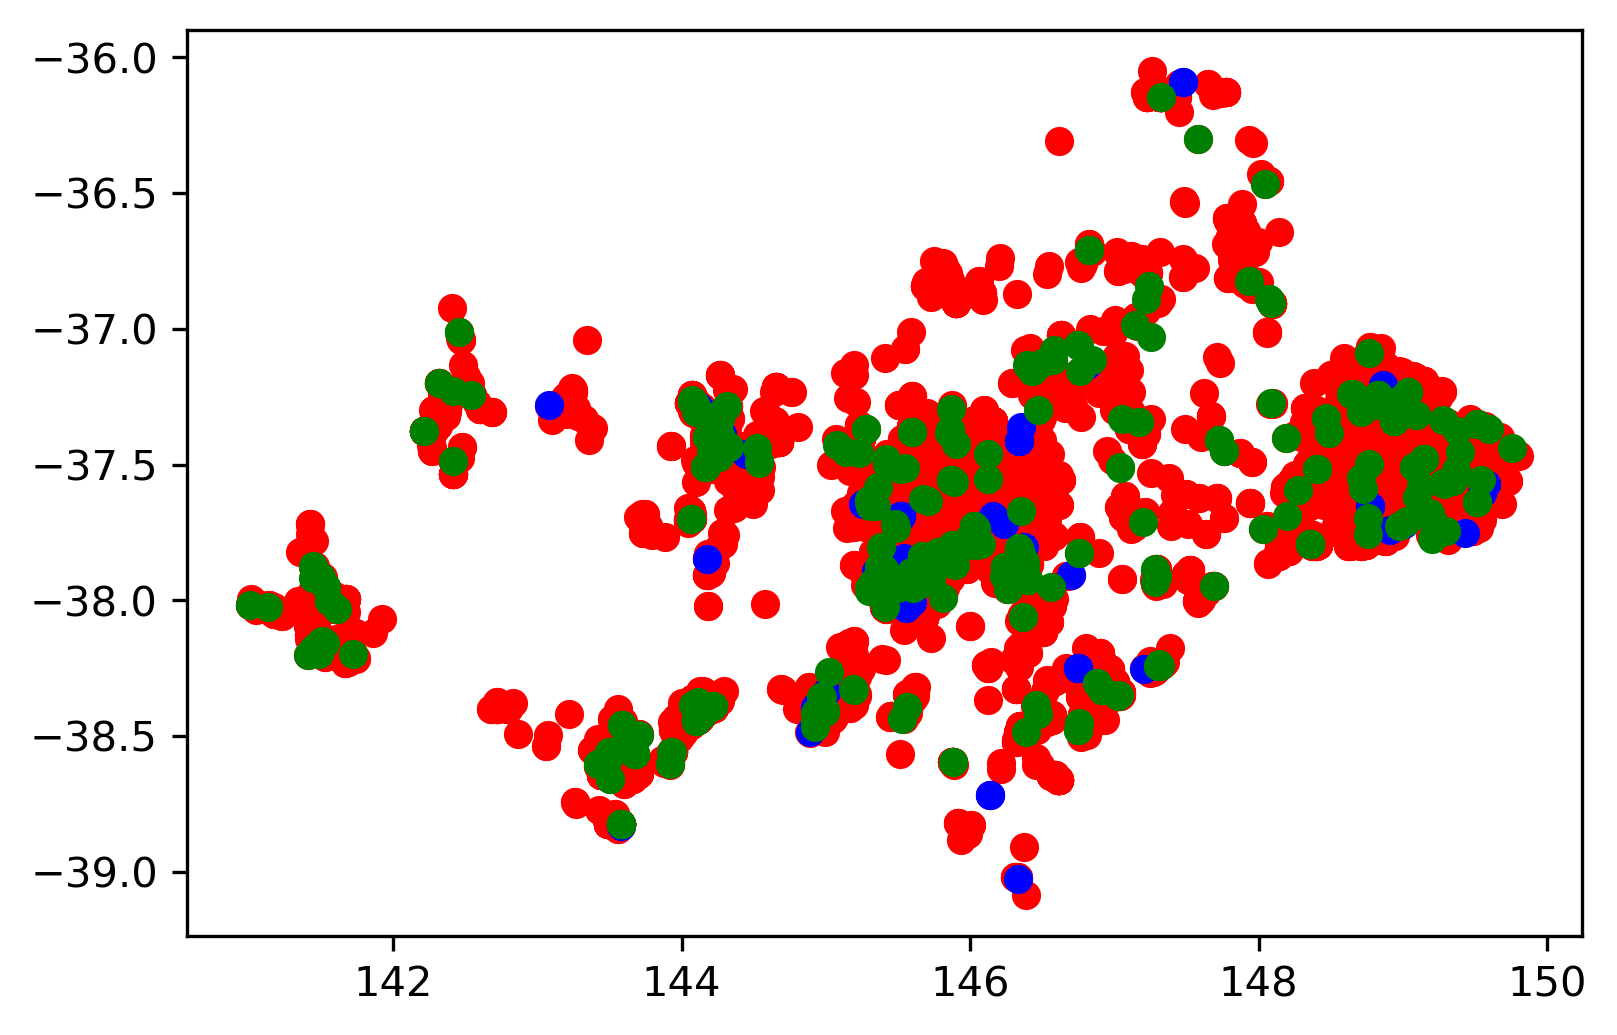

In [24]:
import matplotlib.pyplot as plt
plt.plot(env_train['longitudedd_num'], env_train['latitudedd_num'], 'ro')
env_test_outlier = []
env_test_inlier = []
for i in range(len(y_pred_test)):
    if y_pred_test[i] == -1:
        env_test_outlier.append(i)
    else:
        env_test_inlier.append(i)
        
plt.plot(env_test['longitudedd_num'].iloc[env_test_outlier], env_test['latitudedd_num'].iloc[env_test_outlier], 'bo')
plt.plot(env_test['longitudedd_num'].iloc[env_test_inlier], env_test['latitudedd_num'].iloc[env_test_inlier], 'go')

plt.show()


In [80]:
env_test_inlier

[33, 46]

In [15]:
from absence_generation import get_dataset_by_species 
from absence_generation import get_coordinates_of_species 
import pandas as pd

species_data = get_dataset_by_species(504391)
species_data.reset_index(drop=True, inplace=True)
coordinates = get_coordinates_of_species(504391)
coordinates = pd.DataFrame(coordinates, columns = ['longitudedd_num','latitudedd_num'])

    
# the below line will join the lat/long columns with the environmental factors
# stripping away the rest
environmental_features = coordinates.join(species_data.iloc[:,16:])
environmental_features

longitudedd_num  latitudedd_num  SummerPre1750Landsat75_300_900m_0  \
0       2.724394e+06    2.379104e+06                        1854.276855   
1       2.724233e+06    2.379447e+06                        1946.211182   
2       2.712328e+06    2.369672e+06                        1682.266846   
3       2.722042e+06    2.377748e+06                        1718.208130   
4       2.266800e+06    2.492504e+06                        1896.152100   
5       2.693360e+06    2.359374e+06                        1851.331299   
6       2.229049e+06    2.441859e+06                        1753.601196   
7       2.468481e+06    2.468463e+06                        2122.920654   
8       2.143043e+06    2.544596e+06                        1815.349609   
9       2.174921e+06    2.365469e+06                        2059.179199   
10      2.264140e+06    2.474085e+06                        1611.911987   
11      2.187632e+06    2.408223e+06                        2002.448364   
12      2.724053e+06    2.379113e+06                        1881.072998   
13      2.707824e+06    2.365868e+06                        1836.749878   
14      2.716363e+06    2.373115e+06                        1668.980225   
15      2.724283e+06    2.379508e+06                        1985.762329   
16      2.722113e+06    2.377654e+06                        1738.139893   
17      2.722068e+06    2.377809e+06                        1698.350586   
18      2.716228e+06    2.372626e+06                        1706.873291   
19      2.267426e+06    2.499397e+06                        1823.584717   
20      2.415947e+06    2.421553e+06                        2107.394287   
21      2.260231e+06    2.469972e+06                        1908.492676   
22      2.173074e+06    2.375007e+06                        2213.044678   
23      2.153729e+06    2.449978e+06                        1872.030273   
24      2.723906e+06    2.379055e+06                        1864.058716   
25      2.721515e+06    2.378131e+06                        1829.142456   
26      2.712434e+06    2.369083e+06                        1728.278076   
27      2.715097e+06    2.372254e+06                        1756.371094   
28      2.724469e+06    2.379133e+06                        1884.770752   
29      2.712325e+06    2.369580e+06                        1711.509399   
..               ...             ...                                ...   
373     2.430073e+06    2.476509e+06                        2005.030518   
374     2.266356e+06    2.476865e+06                        1876.321533   
375     2.160510e+06    2.501309e+06                        1991.227051   
376     2.721589e+06    2.378130e+06                        1807.139160   
377     2.712434e+06    2.369052e+06                        1728.278076   
378     2.724183e+06    2.379418e+06                        1928.698242   
379     2.722113e+06    2.377654e+06                        1738.139893   
380     2.717326e+06    2.374541e+06                        1653.489502   
381     2.723900e+06    2.379765e+06                        1907.463867   
382     2.250651e+06    2.480055e+06                        1790.910278   
383     2.733711e+06    2.513345e+06                        2125.934082   
384     2.427741e+06    2.509368e+06                        2016.114868   
385     2.712214e+06    2.370107e+06                        1692.251709   
386     2.254977e+06    2.452993e+06                        1887.845947   
387     2.185321e+06    2.409665e+06                        1959.544678   
388     2.542992e+06    2.519741e+06                        2046.230225   
389     2.721638e+06    2.378159e+06                        1796.565430   
390     2.720885e+06    2.378271e+06                        1698.920044   
391     2.712312e+06    2.369055e+06                        1809.503296   
392     2.716316e+06    2.374135e+06                        1677.560059   
393     2.708832e+06    2.366275e+06                        1779.306152   
394     2.716321e+06    2.3724

In [17]:
cols = environmental_features.columns.tolist()
cols = cols[-1:] + cols[:-1]
environmental_features = environmental_features[cols]
environmental_features


VMLITE_TR_ROAD  longitudedd_num  latitudedd_num  \
0        236.531736     2.724394e+06    2.379104e+06   
1        605.743087     2.724233e+06    2.379447e+06   
2       1660.458017     2.712328e+06    2.369672e+06   
3        624.717591     2.722042e+06    2.377748e+06   
4        846.026410     2.266800e+06    2.492504e+06   
5       4679.916024     2.693360e+06    2.359374e+06   
6       1947.413285     2.229049e+06    2.441859e+06   
7       1607.022792     2.468481e+06    2.468463e+06   
8       9230.117611     2.143043e+06    2.544596e+06   
9        873.173353     2.174921e+06    2.365469e+06   
10      4822.148401     2.264140e+06    2.474085e+06   
11      2364.438809     2.187632e+06    2.408223e+06   
12       454.667495     2.724053e+06    2.379113e+06   
13        22.075297     2.707824e+06    2.365868e+06   
14       484.730587     2.716363e+06    2.373115e+06   
15       622.714920     2.724283e+06    2.379508e+06   
16       506.751841     2.722113e+06    2.377654e+06   
17       656.849489     2.722068e+06    2.377809e+06   
18       773.321532     2.716228e+06    2.372626e+06   
19      3893.567654     2.267426e+06    2.499397e+06   
20      1792.491317     2.415947e+06    2.421553e+06   
21      8254.415012     2.260231e+06    2.469972e+06   
22      1213.213994     2.173074e+06    2.375007e+06   
23      3638.625069     2.153729e+06    2.449978e+06   
24       499.933610     2.723906e+06    2.379055e+06   
25      1251.572556     2.721515e+06    2.378131e+06   
26      2208.639948     2.712434e+06    2.369083e+06   
27       331.581692     2.715097e+06    2.372254e+06   
28       213.333538     2.724469e+06    2.379133e+06   
29      1735.526315     2.712325e+06    2.369580e+06   
..              ...              ...             ...   
373      101.128835     2.430073e+06    2.476509e+06   
374     2147.949515     2.266356e+06    2.476865e+06   
375     1782.703864     2.160510e+06    2.501309e+06   
376     1204.492554     2.721589e+06    2.378130e+06   
377     2233.963996     2.712434e+06    2.369052e+06   
378      614.092935     2.724183e+06    2.379418e+06   
379      506.751841     2.722113e+06    2.377654e+06   
380      191.386149     2.717326e+06    2.374541e+06   
381     1061.258764     2.723900e+06    2.379765e+06   
382     1059.262720     2.250651e+06    2.480055e+06   
383     7429.316875     2.733711e+06    2.513345e+06   
384      535.589766     2.427741e+06    2.509368e+06   
385     1236.942625     2.712214e+06    2.370107e+06   
386      478.425873     2.254977e+06    2.452993e+06   
387     1178.159152     2.185321e+06    2.409665e+06   
388     2329.285679     2.542992e+06    2.519741e+06   
389     1197.579944     2.721638e+06    2.378159e+06   
390     1751.024185     2.720885e+06    2.378271e+06   
391     2163.325791     2.712312e+06    2.369055e+06   
392      326.204963     2.716316e+06    2.374135e+06   
393      500.157445     2.708832e+06    2.366275e+06   
394      953.393549     2.716321e+06    2.372469e+06   
395      953.393549     2.716321e+06    2.372469e+06   
396      815.246759     2.742405e+06    2.515310e+06   
397     2228.056837     2.526543e+06    2.423666e+06   
398      360.573178     2.525630e+06    2.421993e+06   
399      205.280182     2.526279e+06    2.427345e+06   
400      763.279151     2.430385e+06    2.475621e+06   
401     2147.949515     2.266356e+06    2.476865e+06   
402      873.173353     2.174921e+06    2.365469e+06   

     SummerPre1750Landsat75_300_900m_0  SummerPre1750Landsat75_300_900m_1  \
0                          1854.276855                        1414.583008   
1                          1946.211182                        1539.721436   
2                          1682.266846                        1518.023804   
3                          1718.208130                        1443.547363   
4                          1896.152100                        1957.630127   
5                          1851.331299                        1523.090

In [1]:
from absence_generation import generate_absence_points
test = generate_absence_points(1,504391)

   longitudedd_num  latitudedd_num SummerPre1750Landsat75_300_900m_0  \
0     2.836020e+06    2.350079e+06                  777.062377929688   

  SummerPre1750Landsat75_300_900m_1 SummerPre1750Landsat75_300_900m_2  \
0                  568.067626953125                  1.01483309268951   

  SummerPre1750Landsat75_300_900m_3 SummerPre1750Landsat75_300_900m_4  \
0                 0.949493646621704                  1.01483309268951   

  SummerPre1750Landsat75_300_900m_5 SummerPre1750Landsat75_300_900m_6  \
0                 0.949493646621704                  1.01483309268951   

  SummerPre1750Landsat75_300_900m_7  ... SummerLandsat75_300_900m_4  \
0                 0.949493646621704  ...           1.01483309268951   

  SummerLandsat75_300_900m_5 SummerLandsat75_300_900m_6  \
0          0.949493646621704           1.01483309268951   

  SummerLandsat75_300_900m_7 sept2014JanMaxTemp_0 VMLITE_PUBLIC_LAND_SU5  \
0          0.949493646621704     252.765594482422           46883.437836   


In [13]:
import pandas as pd
test1 = test[::-1]
test1
empty_df = pd.DataFrame(columns = test1)
empty_df

Empty DataFrame
Columns: [VMLITE_TR_ROAD, VMLITE_FOREST_SU2, VMLITE_HY_WATER_AREA, VMLITE_BUILT_UP_AREA, VMLITE_PUBLIC_LAND_SU5, sept2014JanMaxTemp_0, SummerLandsat75_300_900m_7, SummerLandsat75_300_900m_6, SummerLandsat75_300_900m_5, SummerLandsat75_300_900m_4, SummerLandsat75_300_900m_3, SummerLandsat75_300_900m_2, SummerLandsat75_300_900m_1, SummerLandsat75_300_900m_0, ibra_hex_0, land_cov_use3_0, ecoregion2014_0, sept2014JanRainfall_0, hydro500xwi_0, ProtectionIndex_0, vegtype3_4_0, sept2014JulMinTemp_0, log_vertical_distance_saline_wetlands_sept2012_0, 75m_dem_streams_burned_sept2012_0, wetness_index_saga_sept2012_0, Anisotrophic_Heating_Ruggedness_0, Radiometrics_2014_th_0, ecoregion1750_0, Radiometrics_2014_k_0, sept2014JulRainfall_0, SummerPre1750Landsat75_300_900m_7, SummerPre1750Landsat75_300_900m_6, SummerPre1750Landsat75_300_900m_5, SummerPre1750Landsat75_300_900m_4, SummerPre1750Landsat75_300_900m_3, SummerPre1750Landsat75_300_900m_2, SummerPre1750Landsat75_300_900m_1, SummerPre1750Landsat75_300_900m_0, latitudedd_num, longitudedd_num]
Index: []

[0 rows x 40 columns]

In [2]:
test2 = empty_df.append([env_train])
test2

Empty DataFrame
Columns: [longitudedd_num, latitudedd_num, SummerPre1750Landsat75_300_900m_0, SummerPre1750Landsat75_300_900m_1, SummerPre1750Landsat75_300_900m_2, SummerPre1750Landsat75_300_900m_3, SummerPre1750Landsat75_300_900m_4, SummerPre1750Landsat75_300_900m_5, SummerPre1750Landsat75_300_900m_6, SummerPre1750Landsat75_300_900m_7, sept2014JulRainfall_0, Radiometrics_2014_k_0, ecoregion1750_0, Radiometrics_2014_th_0, Anisotrophic_Heating_Ruggedness_0, wetness_index_saga_sept2012_0, 75m_dem_streams_burned_sept2012_0, log_vertical_distance_saline_wetlands_sept2012_0, sept2014JulMinTemp_0, vegtype3_4_0, ProtectionIndex_0, hydro500xwi_0, sept2014JanRainfall_0, ecoregion2014_0, land_cov_use3_0, ibra_hex_0, SummerLandsat75_300_900m_0, SummerLandsat75_300_900m_1, SummerLandsat75_300_900m_2, SummerLandsat75_300_900m_3, SummerLandsat75_300_900m_4, SummerLandsat75_300_900m_5, SummerLandsat75_300_900m_6, SummerLandsat75_300_900m_7, sept2014JanMaxTemp_0, VMLITE_PUBLIC_LAND_SU5, VMLITE_BUILT_UP_AREA, VMLITE_HY_WATER_AREA, VMLITE_FOREST_SU2, VMLITE_TR_ROAD]
Index: []

[0 rows x 40 columns]

In [3]:
test

Empty DataFrame
Columns: [longitudedd_num, latitudedd_num, SummerPre1750Landsat75_300_900m_0, SummerPre1750Landsat75_300_900m_1, SummerPre1750Landsat75_300_900m_2, SummerPre1750Landsat75_300_900m_3, SummerPre1750Landsat75_300_900m_4, SummerPre1750Landsat75_300_900m_5, SummerPre1750Landsat75_300_900m_6, SummerPre1750Landsat75_300_900m_7, sept2014JulRainfall_0, Radiometrics_2014_k_0, ecoregion1750_0, Radiometrics_2014_th_0, Anisotrophic_Heating_Ruggedness_0, wetness_index_saga_sept2012_0, 75m_dem_streams_burned_sept2012_0, log_vertical_distance_saline_wetlands_sept2012_0, sept2014JulMinTemp_0, vegtype3_4_0, ProtectionIndex_0, hydro500xwi_0, sept2014JanRainfall_0, ecoregion2014_0, land_cov_use3_0, ibra_hex_0, SummerLandsat75_300_900m_0, SummerLandsat75_300_900m_1, SummerLandsat75_300_900m_2, SummerLandsat75_300_900m_3, SummerLandsat75_300_900m_4, SummerLandsat75_300_900m_5, SummerLandsat75_300_900m_6, SummerLandsat75_300_900m_7, sept2014JanMaxTemp_0, VMLITE_PUBLIC_LAND_SU5, VMLITE_BUILT_UP_AREA, VMLITE_HY_WATER_AREA, VMLITE_FOREST_SU2, VMLITE_TR_ROAD]
Index: []

[0 rows x 40 columns]